In [1]:
# Importar los módulos de los paquetes que instalaste previamente (Pandas y Matplotlib).
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
#Definir un estilo para las visualizaciones. Si quieres consultar los estilos busca "Style sheets reference Matplotlib".
plt.style.use('seaborn-poster')

In [2]:
# ¿De dónde vamos a sacar los datos? De la repo mencionada en este repositorio. Para definirlo como variable utilizamos la siguiente línea: 
url = 'https://raw.githubusercontent.com/mariorz/covid19-mx-time-series/master/data/full/by_hospital_state/suspects_by_symptoms_date_mx.csv'

In [3]:
# Ya definido URL como el archivo CSV del enlace, creamos un DataFrame desde la lectura del mismo csv. También designaremos como índice la columna 0, para poder filtrar en la siguiente línea de código por estado. 
df = pd.read_csv(url, index_col=0)

In [4]:
# Dentro del DataFrame (que convocamos usando "df") filtramos con la propiedad "loc". Para seccionar el estado, cambia Colima por aquel que quieras analizar (no borres las ''). Después modifica las fechas que están en formato DDMMYYYY. En mi caso elegí el 18 de marzo como el principio de la visualización, porque fue el día en que se registró el primer caso en Colima. La siguiente fecha, en este caso el 12 de agosto del 2020, deberá de ser sustituida por la más reciente. 
df = df.loc['Colima','18-03-2020':'12-08-2020']

In [5]:
# Reformulamos otra vez el filtro creado en la línea anterior para crear de nuevo un un DataFrame desde Pandas.
df = pd.DataFrame(df)

In [6]:
#Por último, dale formato de fecha al índice del DataFrame. 
df.index = pd.to_datetime(df.index, format='%d-%m-%Y')

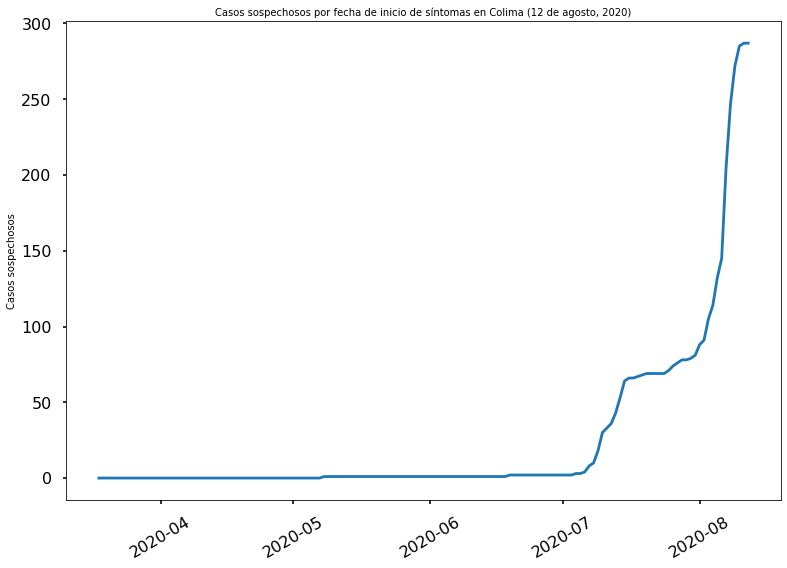

In [7]:
# Para crear una figura y un sólo eje (x, y). En las próximas líneas veran cómo los usamos.
fig, ax = plt.subplots()
# Crea gráfica de un sólo eje desde el DataFrame que creamos en la celda anterior (df)
ax.plot(df)
# La siguiente línea es para asignar texto al eje 'y'. Para cambiar el tamaño de la letra, basta con cambiar el valor número después del 'fontsize='.
ax.set_ylabel('Casos sospechosos', fontsize=10)
# Aquí puedes cambiar el título de la gráfica. En este caso, el título alude a los datos de la url y la última fecha de actualización
ax.set_title('Casos sospechosos por fecha de inicio de síntomas en Colima (12 de agosto, 2020)', fontsize=10)
# Para rotar el texto del eje 'x'. En el caso de nuestra gráfica, este eje corresponde a las fechas.
plt.xticks(rotation=30)
# En la siguiente y última línea, guardarás la gráfica que generaste en formato '.png'. El "dpi" es para aumentar/bajar la resolución/calidad de la gráfica.
plt.savefig('sospechosos_sintomas.png', dpi=500)